Being quite a lazy person, my natural inclination is to just bottleneck one of the standard CNNs and then train a small fully connected NN model... so we'll do that first.... probably deals with overfitting a bit better too... We use some data augmentation to further improve against over-fitting.

Then we'll try fine tuning the same model.

Finally we'll build a basic CNN from scratch...

And finally finally we'll try one of Hinton's shiny new Capsule networks just for shits and giggles.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, show, subplot, title, get_cmap, hist
import numpy as np
from PIL import Image, ImageOps, ImageChops
import cv2
import os
import pickle
import itertools

#Inline Matplot graphics into the notebook
%matplotlib inline 


# From: https://gist.github.com/fabeat/6621507
# Using the version in the comments to the Gist
# Best practice default is using Bicubic rather than Antialias per http://pillow.readthedocs.io/en/3.0.x/releasenotes/2.7.0.html#default-filter-for-thumbnails
def scale(image, max_size=(128,128), method=Image.BICUBIC):
    """
    resize 'image' to 'max_size' keeping the aspect ratio
    and place it in center of white 'max_size' image
    """
    image.thumbnail(max_size, method)
    offset = (int((max_size[0] - image.size[0]) // 2), int((max_size[1] - image.size[1]) // 2))
    back = Image.new("RGB", max_size, "white")
    back.paste(image, offset)

    return back




In [6]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image as kimage
from keras.applications.resnet50 import preprocess_input, decode_predictions

resnet50_model = ResNet50(weights='imagenet', include_top=False)


In [82]:
import Augmentor
gear_images_dir = "../gear_images"
data = list()
hddata = list()
labels = list()
images = list()
features = list()
for directory in os.listdir(gear_images_dir):
    current_dir = gear_images_dir + '/' + directory
    print('Loading images from: {}'.format(current_dir))
    for imgName in os.listdir(os.fsencode(current_dir)):
        print('Loading: {}'.format(os.fsdecode(imgName)))
        image = Image.open(current_dir + '/' + os.fsdecode(imgName)) #Open as greyscale
        image = ImageOps.equalize(scale(image))
        images.append(image)
        data.append(np.asarray(image.convert('L')).flatten())
        labels.append(directory)
        
        #Featurize via ResNet50
        img = kimage.load_img(current_dir + '/' + os.fsdecode(imgName), target_size=(224, 224))
        x = kimage.img_to_array(img)
        hddata.append(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features.append(resnet50_model.predict(x))
        
    print('Done')   

Loading images from: ../gear_images/hardshell_jackets
Loading: 10269657x1110671_zm.jpeg
Loading: 10269570x1037095_zm.jpeg
Loading: 10331929x1050984_zm.jpeg
Loading: 10296834x1118322_zm.jpeg
Loading: 10237214x1012905_zm.jpeg
Loading: 111417.jpeg
Loading: 10116634x1038116_zm.jpeg
Loading: 10313298x1037114_zm.jpeg
Loading: 10333985x1011887_zm.jpeg
Loading: 118016.jpeg
Loading: 10333985x1013457_zm.jpeg
Loading: 10331926x1084490_zm.jpeg
Loading: 10320632x1012379_zm.jpeg
Loading: 10300494x1012905_zm.jpeg
Loading: 10374825x1010913_zm.jpeg
Loading: 10332294x1038816_zm.jpeg
Loading: 10302867x1150402_zm.jpeg
Loading: 117497.jpeg
Loading: 10345238x1151063_zm.jpeg
Loading: 10214105x1012870_zm.jpeg
Loading: 10342599x1014140_zm.jpeg
Loading: 10329963x1110671_zm.jpeg
Loading: 10349576x1068136_zm.jpeg
Loading: 10329549x1012798_zm.jpeg
Loading: 10207377x1012905_zm.jpeg
Loading: 10300351x1012905_zm.jpeg
Loading: 10254722x1114321_zm.jpeg
Loading: 10350143x1158212_zm.jpeg
Loading: 10313471x1006424_zm.jpeg

Loading: 10220010x1012905_zm.jpeg
Loading: 10359422x1006424_zm.jpeg
Loading: 10349909x1012905_zm.jpeg
Loading: 859978.jpeg
Loading: 10317470x1152153_zm.jpeg
Loading: 10185324x1016653_zm.jpeg
Loading: 10281158x1128706_zm.jpeg
Loading: 10245195x1152818_zm.jpeg
Loading: 10317665x1012245_zm.jpeg
Loading: 10237625x1013303_zm.jpeg
Loading: 10302530x1058060_zm.jpeg
Loading: 10330310x1090156_zm.jpeg
Loading: 10313301x1012905_zm.jpeg
Loading: 10300351x1149781_zm.jpeg
Loading: 10313471x1012905_zm.jpeg
Loading: 10185325x1011131_zm.jpeg
Loading: 10245196x1152818_zm.jpeg
Loading: 10269657x1012905_zm.jpeg
Loading: 10349749x1154847_zm.jpeg
Loading: 10329963x1012905_zm.jpeg
Loading: 10329963x1037118_zm.jpeg
Loading: 10330310x1140867_zm.jpeg
Loading: 10354021x1104546_zm.jpeg
Loading: 10330387x1128450_zm.jpeg
Loading: 10320632x1012905_zm.jpeg
Loading: 10280745x1044757_zm.jpeg
Loading: 10329537x1035919_zm.jpeg
Loading: 10331929x1125962_zm.jpeg
Loading: 10220099x1012905_zm.jpeg
Loading: 10342598x1012905_z

Loading: 41EQuHV1ZfL._AC_US436_QL65_.jpg
Loading: 100169.jpeg
Loading: 10215224x1003635_zm.jpeg
Loading: 516YxIi4S-L._AC_US436_QL65_.jpg
Loading: 419bkVWfdtL._AC_US436_QL65_.jpg
Loading: 10311159_zm.jpeg
Loading: 41HAvdi6TVL._AC_US436_QL65_.jpg
Loading: 851352.jpeg
Loading: 51SLroEST-L._AC_US436_QL65_.jpg
Loading: 41PakpF3-NL._AC_US436_QL65_.jpg
Loading: 2022033_701_main.jpg
Loading: 41xxUh2pV2L._AC_US436_QL65_.jpg
Loading: 100501.jpeg
Loading: 10260952x1011898_zm.jpeg
Loading: 10311166_zm.jpeg
Loading: 10101041x1049516_zm.jpeg
Loading: 10285553x1024698_zm.jpeg
Loading: 10260978x1012549_zm.jpeg
Loading: 10285552x1024698_zm.jpeg
Loading: 2022020_001_main.jpg
Loading: 1312844_000_main.jpg
Loading: 41hbRAegIKL._AC_US436_QL65_.jpg
Loading: 10285550x1024698_zm.jpeg
Loading: 810818.jpeg
Loading: 412N335RtzL._AC_US436_QL65_.jpg
Loading: 41L3nwPccfL._AC_US436_QL65_.jpg
Loading: 10260977x1012549_zm.jpeg
Loading: 10260950x1012163_zm.jpeg
Loading: 10260967_zm.jpeg
Loading: 10373997_zm.jpeg
Loadin

Loading: 10331875x1060332_zm.jpeg
Loading: 10311152x1036971_zm.jpeg
Loading: 10273588x1038042_zm.jpeg
Loading: 880933.jpeg
Loading: 100516.jpeg
Loading: 10229137x1011834_zm.jpeg
Loading: 10188319x1039671_zm.jpeg
Loading: 10021542x1037092_zm.jpeg
Loading: 2039661_408_main.jpg
Loading: 10286244x1003070_zm.jpeg
Loading: 51HxICBatUL._AC_US436_QL65_.jpg
Loading: 107313.jpeg
Loading: 10373820_zm.jpeg
Loading: 10229137x1011834_zm (2).jpeg
Loading: 1313485_408_main.png
Loading: 10308308x1125046_zm.jpeg
Loading: 100971.jpeg
Loading: 10100950x1003070_zm.jpeg
Loading: 2039619_004_main.jpg
Loading: 2036231_408_main.jpg
Loading: 10329866x1036905_zm.jpeg
Loading: 10373982_zm.jpeg
Loading: 10347174x1055935_zm.jpeg
Loading: 10286265x1042156_zm.jpeg
Loading: 10266910x1072613_zm.jpeg
Loading: 2039609_004_main.jpg
Loading: 2039692_001_main.jpg
Loading: 899115.jpeg
Loading: 1313569_408_main.jpg
Loading: 10266909x1101065_zm.jpeg
Loading: 2031667_411_main.jpg
Loading: 51mZGai7C4L._AC_US436_QL65_.jpg
Loading

Loading: 10345378x1012905_zm.jpeg
Loading: 41Gs9Iwf3QL._AC_US320_QL65_.jpg
Loading: 41YkwrZZ+cL._AC_US320_QL65_.jpg
Loading: 10285497x1012905_zm.jpeg
Loading: 2433450001_145349_png_overview_5.png
Loading: 116577.png
Loading: 10344057x1149992_zm.jpeg
Loading: 10374248x1012905_zm.jpeg
Loading: 10271704x1013861_zm.jpeg
Loading: 10315544x1130062_zm.jpeg
Loading: 2433390681_145351_png_overview_5.png
Loading: 10344696x1050984_zm.jpeg
Loading: 852695.jpeg
Loading: 10282925x1012905_zm.jpeg
Loading: 10344769x1050984_zm.jpeg
Loading: 51sPffZbkXL._AC_US320_QL65_.jpg
Loading: 10230858x1012379_zm.jpeg
Loading: 10352662x1168865_zm.jpeg
Loading: 10344776x1039228_zm.jpeg
Loading: 2433720001_145379_png_overview_5.png
Loading: 10345467x1040231_zm.jpeg
Loading: 2433580189_145362_png_overview_7.png
Loading: 837317.jpeg
Loading: 10254282x1012905_zm.jpeg
Loading: 10208335x1014040_zm.jpeg
Loading: 10224836x1012905_zm.jpeg
Loading: 2433460001_145348_png_overview_6.png
Loading: 10347165x1010953_zm.jpeg
Loading

Loading: 114546.jpeg
Loading: 10373822x1013041_zm.jpeg
Loading: 10244025x1012549_zm.jpeg
Loading: 2027608_707_main.jpg
Loading: 10275596x1090012_zm.jpeg
Loading: 2025154_707_main.jpg
Loading: 10105778x1012905_zm.jpeg
Loading: 113456.jpeg
Loading: 10253727x1012549_zm.jpeg
Loading: 10253708x1013861_zm.jpeg
Loading: 10299119x1011898_zm.jpeg
Loading: 10277183x1106581_zm.jpeg
Loading: 898356.jpeg
Loading: 10277186x1106724_zm.jpeg
Loading: 10373970x1012549_zm.jpeg
Loading: 100524.jpeg
Loading: 10215514x1011898_zm.jpeg
Loading: 898355.jpeg
Loading: 10291108x1010913_zm.jpeg
Loading: 2027610_408_main.jpg
Loading: 10091144x1012549_zm.jpeg
Loading: 10336336x1091891_zm.jpeg
Loading: 10337623x1107706_zm.jpeg
Loading: 10331758x1141978_zm.jpeg
Loading: 10321080x1011898_zm.jpeg
Loading: 10217497x1012549_zm.jpeg
Loading: 2025159_801_main.jpg
Loading: 10337619x1145783_zm.jpeg
Loading: 897869.jpeg
Loading: 113458.jpeg
Loading: 10331754x1141976_zm.jpeg
Loading: 10299119x1012549_zm.jpeg
Loading: 10373950x1

Loading: 10190075x1145821_zm.jpeg
Loading: 10085954x1114172_zm.jpeg
Loading: 10311145x1013039_zm.jpeg
Loading: 110031.jpeg
Loading: 10187948x1011898_zm.jpeg
Loading: 10308590x1010868_zm.jpeg
Loading: 10253748x1010868_zm.jpeg
Loading: 10311144x1013039_zm.jpeg
Loading: 2039611_101_main.jpg
Loading: 10308340x1027215_zm.jpeg
Loading: 100973.jpeg
Loading: 10187948x1012905_zm.jpeg
Loading: 100536.jpeg
Done
Loading images from: ../gear_images/insulated_jackets
Loading: 10281833x1012905_zm.jpeg
Loading: 10314736x1013433_zm.jpeg
Loading: 10305668x1036951_zm.jpeg
Loading: 10312644x1090156_zm.jpeg
Loading: 10281299x1149086_zm.jpeg
Loading: 10342602x1044830_zm.jpeg
Loading: 10254529x1149208_zm.jpeg
Loading: 10281638x1149698_zm.jpeg
Loading: 10344854x1050984_zm.jpeg
Loading: 10342602x1086248_zm.jpeg
Loading: 10317107x1050984_zm.jpeg
Loading: 10252810x1149856_zm.jpeg
Loading: 118504.jpeg
Loading: 10223782x1150954_zm.jpeg
Loading: 10281834x1038343_zm.jpeg
Loading: 10254528x1063556_zm.jpeg
Loading: 11

Loading: 10316923x1126139_zm.jpeg
Loading: 10281835x1038337_zm.jpeg
Loading: 10312818x1067347_zm.jpeg
Loading: 10252803x1044494_zm.jpeg
Done
Loading images from: ../gear_images/tents
Loading: 2045441_004_main.jpg
Loading: 10093774x1043840_zm.jpeg
Loading: 2030167_707_main.jpg
Loading: 10303013x1071766_zm.jpeg
Loading: 41ze1E8pypL._AC_US436_QL65_.jpg
Loading: 10235933x1063631_zm.jpeg
Loading: 10192296x1011209_zm.jpeg
Loading: 10101460x1013039_zm.jpeg
Loading: 10093770x1040008_zm.jpeg
Loading: 2030177_004_main.jpg
Loading: 2022534_101_main.jpg
Loading: 41fXwgWYOfL._AC_US436_QL65_.jpg
Loading: 117562.jpeg
Loading: 2023997_805_main.jpg
Loading: 2036244_004_main.jpg
Loading: 10368522_zm.jpeg
Loading: 2030174_003_main.jpg
Loading: 894568.jpeg
Loading: 10101467x1010913_zm.jpeg
Loading: 10334708x1011898_zm.jpeg
Loading: 10333583x1043973_zm.jpeg
Loading: 10271724x1014212_zm.jpeg
Loading: 2030148_602_main.jpg
Loading: 10331168x1010913_zm.jpeg
Loading: 880786.jpeg
Loading: 10302425x1071766_zm.jpe

Loading: 2031659_007_main.jpg
Loading: 10329889x1010938_zm.jpeg
Loading: 10301693_zm.jpeg
Loading: 41tKgddXH7L._AC_US436_QL65_.jpg
Loading: 10110590x1010938_zm.jpeg
Loading: PAAAIAGACDMAGPPEx1024698_zm.jpeg
Loading: 10364090x1164844_zm.jpeg
Loading: 10337577x1011898_zm.jpeg
Loading: 10290909x1012905_zm.jpeg
Loading: 10301635x1049516_zm.jpeg
Loading: 10019210x1014941_zm.jpeg
Loading: 10080850x1149501_zm.jpeg
Loading: 117542.jpeg
Loading: 10329881x1010938_zm.jpeg
Loading: 10308242x1125087_zm.jpeg
Loading: 10338927_zm.jpeg
Loading: 10338929_zm.jpeg
Loading: 899068.jpeg
Loading: 10290841x1011898_zm.jpeg
Loading: 41yiqFEt1QL._AC_US436_QL65_.jpg
Loading: 10337557x1011898_zm.jpeg
Loading: 10234820x1010938_zm.jpeg
Loading: 10301635x1024698_zm.jpeg
Loading: 10308239x1125093_zm.jpeg
Loading: 10337577x1037283_zm.jpeg
Loading: 10337575_zm.jpeg
Loading: 10357852x1010913_zm.jpeg
Loading: 41SkKrToBVL._AC_US436_QL65_.jpg
Loading: 5116xRoAFaL._AC_US436_QL65_.jpg
Loading: 471041.jpeg
Loading: 10337559_z

In [83]:
data_array = np.asarray(data)
print(data_array.shape)

hddata_array = np.asarray(hddata)
print(hddata_array.shape)

label_array = np.asarray(labels)
print(label_array.shape)

feature_array = np.asarray(np.squeeze(features))
print(feature_array.shape)

num_classes= len(list(set(labels)))
print(num_classes)

(2129, 16384)
(2129, 224, 224, 3)
(2129,)
(2129, 2048)
12


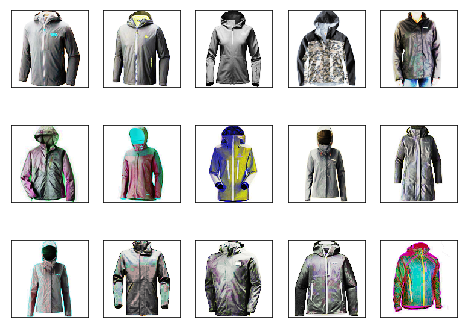

In [84]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(images[i], cmap=plt.cm.bone)

In [85]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
le.fit(label_array)
encoded_label_array = le.transform(label_array)

In [86]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_array,
        encoded_label_array, random_state=0)

X_feat_train, X_feat_test, y_feat_train, y_feat_test = train_test_split(feature_array,
        encoded_label_array, random_state=0)

X_hd_train, X_hd_test, y_hd_train, y_hd_test = train_test_split(hddata_array,
        encoded_label_array, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(X_feat_train.shape, X_feat_test.shape)
print(y_feat_train.shape, y_feat_test.shape)

(1596, 16384) (533, 16384)
(1596,) (533,)
(1596, 2048) (533, 2048)
(1596,) (533,)


Train a simple fully connected model on the features we bottlenecked out. We can see how much of a problem that overfitting is. By playing with the hyper-parameters; e.g. try changing numberof units in the layers.

In [88]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = None
model = Sequential()
model.add(Dense(32,input_dim=len(X_feat_train[1,:])))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(X_feat_train, y_feat_train,
          epochs=50,
          batch_size=30,
          validation_data=(X_feat_test, y_feat_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                65568     
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_66 (Dense)             (None, 12)                396       
Total params: 67,020
Trainable params: 67,020
Non-trainable params: 0
_________________________________________________________________
Train on 1596 samples, validate on 533 samples
Epoch 1/50
1596/1596 [==============================] - 3s 2ms/step - loss: 1.6036 - acc: 0.4530 - val_loss: 0.5019 - val_acc: 0.9287
Epoch 2/50
1596/1596 [==============================] - 1s 812us/step - loss: 0.6658 - ac

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = resnet50_model #As we already loaded the model above.

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- of size num_classes
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train the model on the new data for a few epochs
model.fit(X_hd_train, y_hd_train,
          epochs=50,
          batch_size=30,
          validation_data=(X_hd_test, y_hd_test))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

1596/1596 [==============================] - 618s 387ms/step - loss: 1.0686 - acc: 0.8546 - val_loss: 1.3159 - val_acc: 0.8218
Epoch 2/50
1596/1596 [==============================] - 628s 393ms/step - loss: 0.1966 - acc: 0.9624 - val_loss: 0.2771 - val_acc: 0.9231
Epoch 3/50
1596/1596 [==============================] - 623s 390ms/step - loss: 0.0888 - acc: 0.9787 - val_loss: 0.1347 - val_acc: 0.9794
Epoch 4/50
1596/1596 [==============================] - 624s 391ms/step - loss: 0.0516 - acc: 0.9862 - val_loss: 0.1797 - val_acc: 0.9775
Epoch 5/50
 990/1596 [=================>............] - ETA: 2:42 - loss: 0.0699 - acc: 0.9838

Train a new, simple CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape=(3, 128, 128)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

We can visualize the principal components

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(np.asarray(images[0].convert('L')).shape),
              cmap=plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

Now we can fit an SVM with RBF kernel to the data.

In [ ]:
from sklearn import svm
clf = svm.SVC(C=5., kernel='rbf', gamma=0.001)
clf.fit(X_train_pca, y_train)
pickle.dump(clf, open( "svm.p", "wb" ) )

The model does a reasonable job of predicting outcomes. It will not be particularly robust to scale and rotational transforms but it's pretty impressive for such a simple model.

In [ ]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(np.asarray(images[0].convert('L')).shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred,
                 fontsize='small', color=color)

In [ ]:
def print_metrics(y_pred):
    from sklearn import metrics
    y_pred = clf.predict(X_test_pca)
    print(metrics.classification_report(y_test, y_pred))
    
print_metrics(y_pred)

In [ ]:
# Pretty print CM from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def print_confusion_matrix(y_test_y_pred,sorted_labels)    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure(figsize=(12, 12))
    plot_confusion_matrix(cnf_matrix, classes=cm_labels,
                      title='Confusion matrix')
    
cm_labels = list(set(labels))
cm_labels.sort()
print_confusion_matrix(y_test,y_pred,cm_labels)

In [ ]:

def predict_class(url):
    import requests
    from io import BytesIO

    images = list()
    data = list()

    response = requests.get(url)
    image = Image.open(BytesIO(response.content))

    image = ImageOps.equalize(scale(image))
    images.append(image.convert('LA'))
    data.append(np.asarray(image.convert('L')).flatten())

    file = open("pca.p",'rb')
    pca = pickle.load(file)

    file = open("svm.p",'rb')
    clf = pickle.load(file)


    data_array = np.asarray(data)
    print(data_array.shape)

    X_test_pca = pca.transform(data_array)
    print(X_test_pca.shape)
    y_pred = clf.predict(X_test_pca)
    return y_pred

#image_url = "https://www.blackdiamondequipment.com/dw/image/v2/AAKN_PRD/on/demandware.static/-/Sites-bdel/default/dwaad1abaf/products/carabiners_draws/S16/210275_RockLock_Screwgate_Carabiner_web.jpg?sw=472"
#print(predict_class(image_url))

